In [1]:
# 2nd practice

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [6]:
ads = pd.read_csv('Social_Network_Ads.csv')
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
print("total" + str(len(ads.index)))
sex = pd.get_dummies(ads['Gender'],drop_first=True)
ads.head()
sex.head()


total400


,Male
0,1
1,1
2,0
3,0
4,1


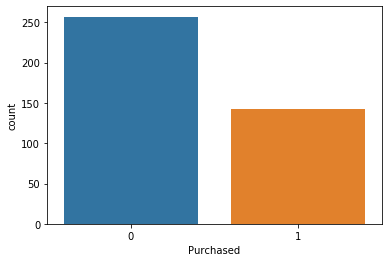

In [11]:
sns.countplot(x = "Purchased",data = ads)

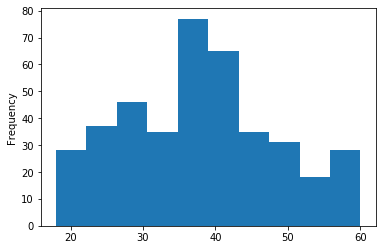

In [13]:
ads["Age"].plot.hist()


In [14]:
ads.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


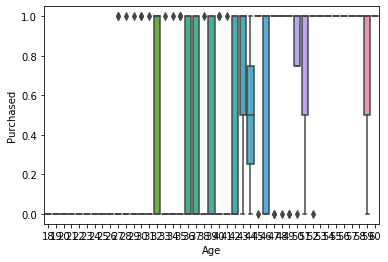

In [16]:
sns.boxplot(x = "Age",y = "Purchased",data = ads)

In [17]:
x = ads.drop("Purchased",axis = 1)

In [28]:
y = ads["Purchased"]
ads = pd.concat([ads,sex],axis = 1)
ads.head()


,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Male
0,15624510,Male,19,19000,0,1,1
1,15810944,Male,35,20000,0,1,1
2,15668575,Female,26,43000,0,0,0
3,15603246,Female,27,57000,0,0,0
4,15804002,Male,19,76000,0,1,1


In [31]:
ads.drop(['Gender','User ID'],axis = 1,inplace = True)

In [67]:
#|ads = pd.concat([ads,sex],axis = 1)

ads.head()
x = ads.iloc[:,[0,1,3]].values  # iloc means to index the columns x input

y = ads.iloc[:,2].values  # y to predict

In [68]:
X_train ,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state =  True)

In [69]:
log = LogisticRegression()
log.fit(X_train,Y_train)

c:\users\shaag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
prediction = log.predict(X_test)
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.57      0.97      0.72        58\n           1       0.00      0.00      0.00        42\n\n    accuracy                           0.56       100\n   macro avg       0.29      0.48      0.36       100\nweighted avg       0.33      0.56      0.42       100\n'

In [71]:
confusion_matrix(Y_test,prediction)

array([[56,  2],
       [42,  0]], dtype=int64)

In [73]:
accuracy_score(Y_test,prediction)

0.56